# Tracing Basics

### Setup

Make sure you set your environment variables, including your OpenAI API key.

In [29]:

from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

### Tracing with @traceable

The @traceable decorator is a simple way to log traces from the LangSmith Python SDK. Simply decorate any function with @traceable.

The decorator works by creating a run tree for you each time the function is called and inserting it within the current trace. The function inputs, name, and other information is then streamed to LangSmith. If the function raises an error or if it returns a response, that information is also added to the tree, and updates are patched to LangSmith so you can detect and diagnose sources of errors. This is all done on a background thread to avoid blocking your app's execution.

In [30]:

from langsmith import traceable
from openai import OpenAI
from typing import List
import nest_asyncio
from utils import get_vector_db_retriever

MODEL_PROVIDER = "openai"
MODEL_NAME = "gpt-4o-mini"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation. 
If you don't know the answer, just say that you don't know. 
Use three sentences maximum and keep the answer concise.
"""

openai_client = OpenAI()
nest_asyncio.apply()
retriever = get_vector_db_retriever()

@traceable
def retrieve_documents(question: str):
    return retriever.invoke(question)   # NOTE: This is a LangChain vector db retriever, so this .invoke() call will be traced automatically

@traceable
def generate_response(question: str, documents):
    formatted_docs = "\n\n".join(doc.page_content for doc in documents)
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Context: {formatted_docs} \n\n Question: {question}"
        }
    ]
    return call_openai(messages)

@traceable
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def langsmith_rag(question: str):
    documents = retrieve_documents(question)
    response = generate_response(question, documents)
    return response.choices[0].message.content


@traceable handles the RunTree lifecycle for you!

A screenshot of my tracings in the langsmith portal

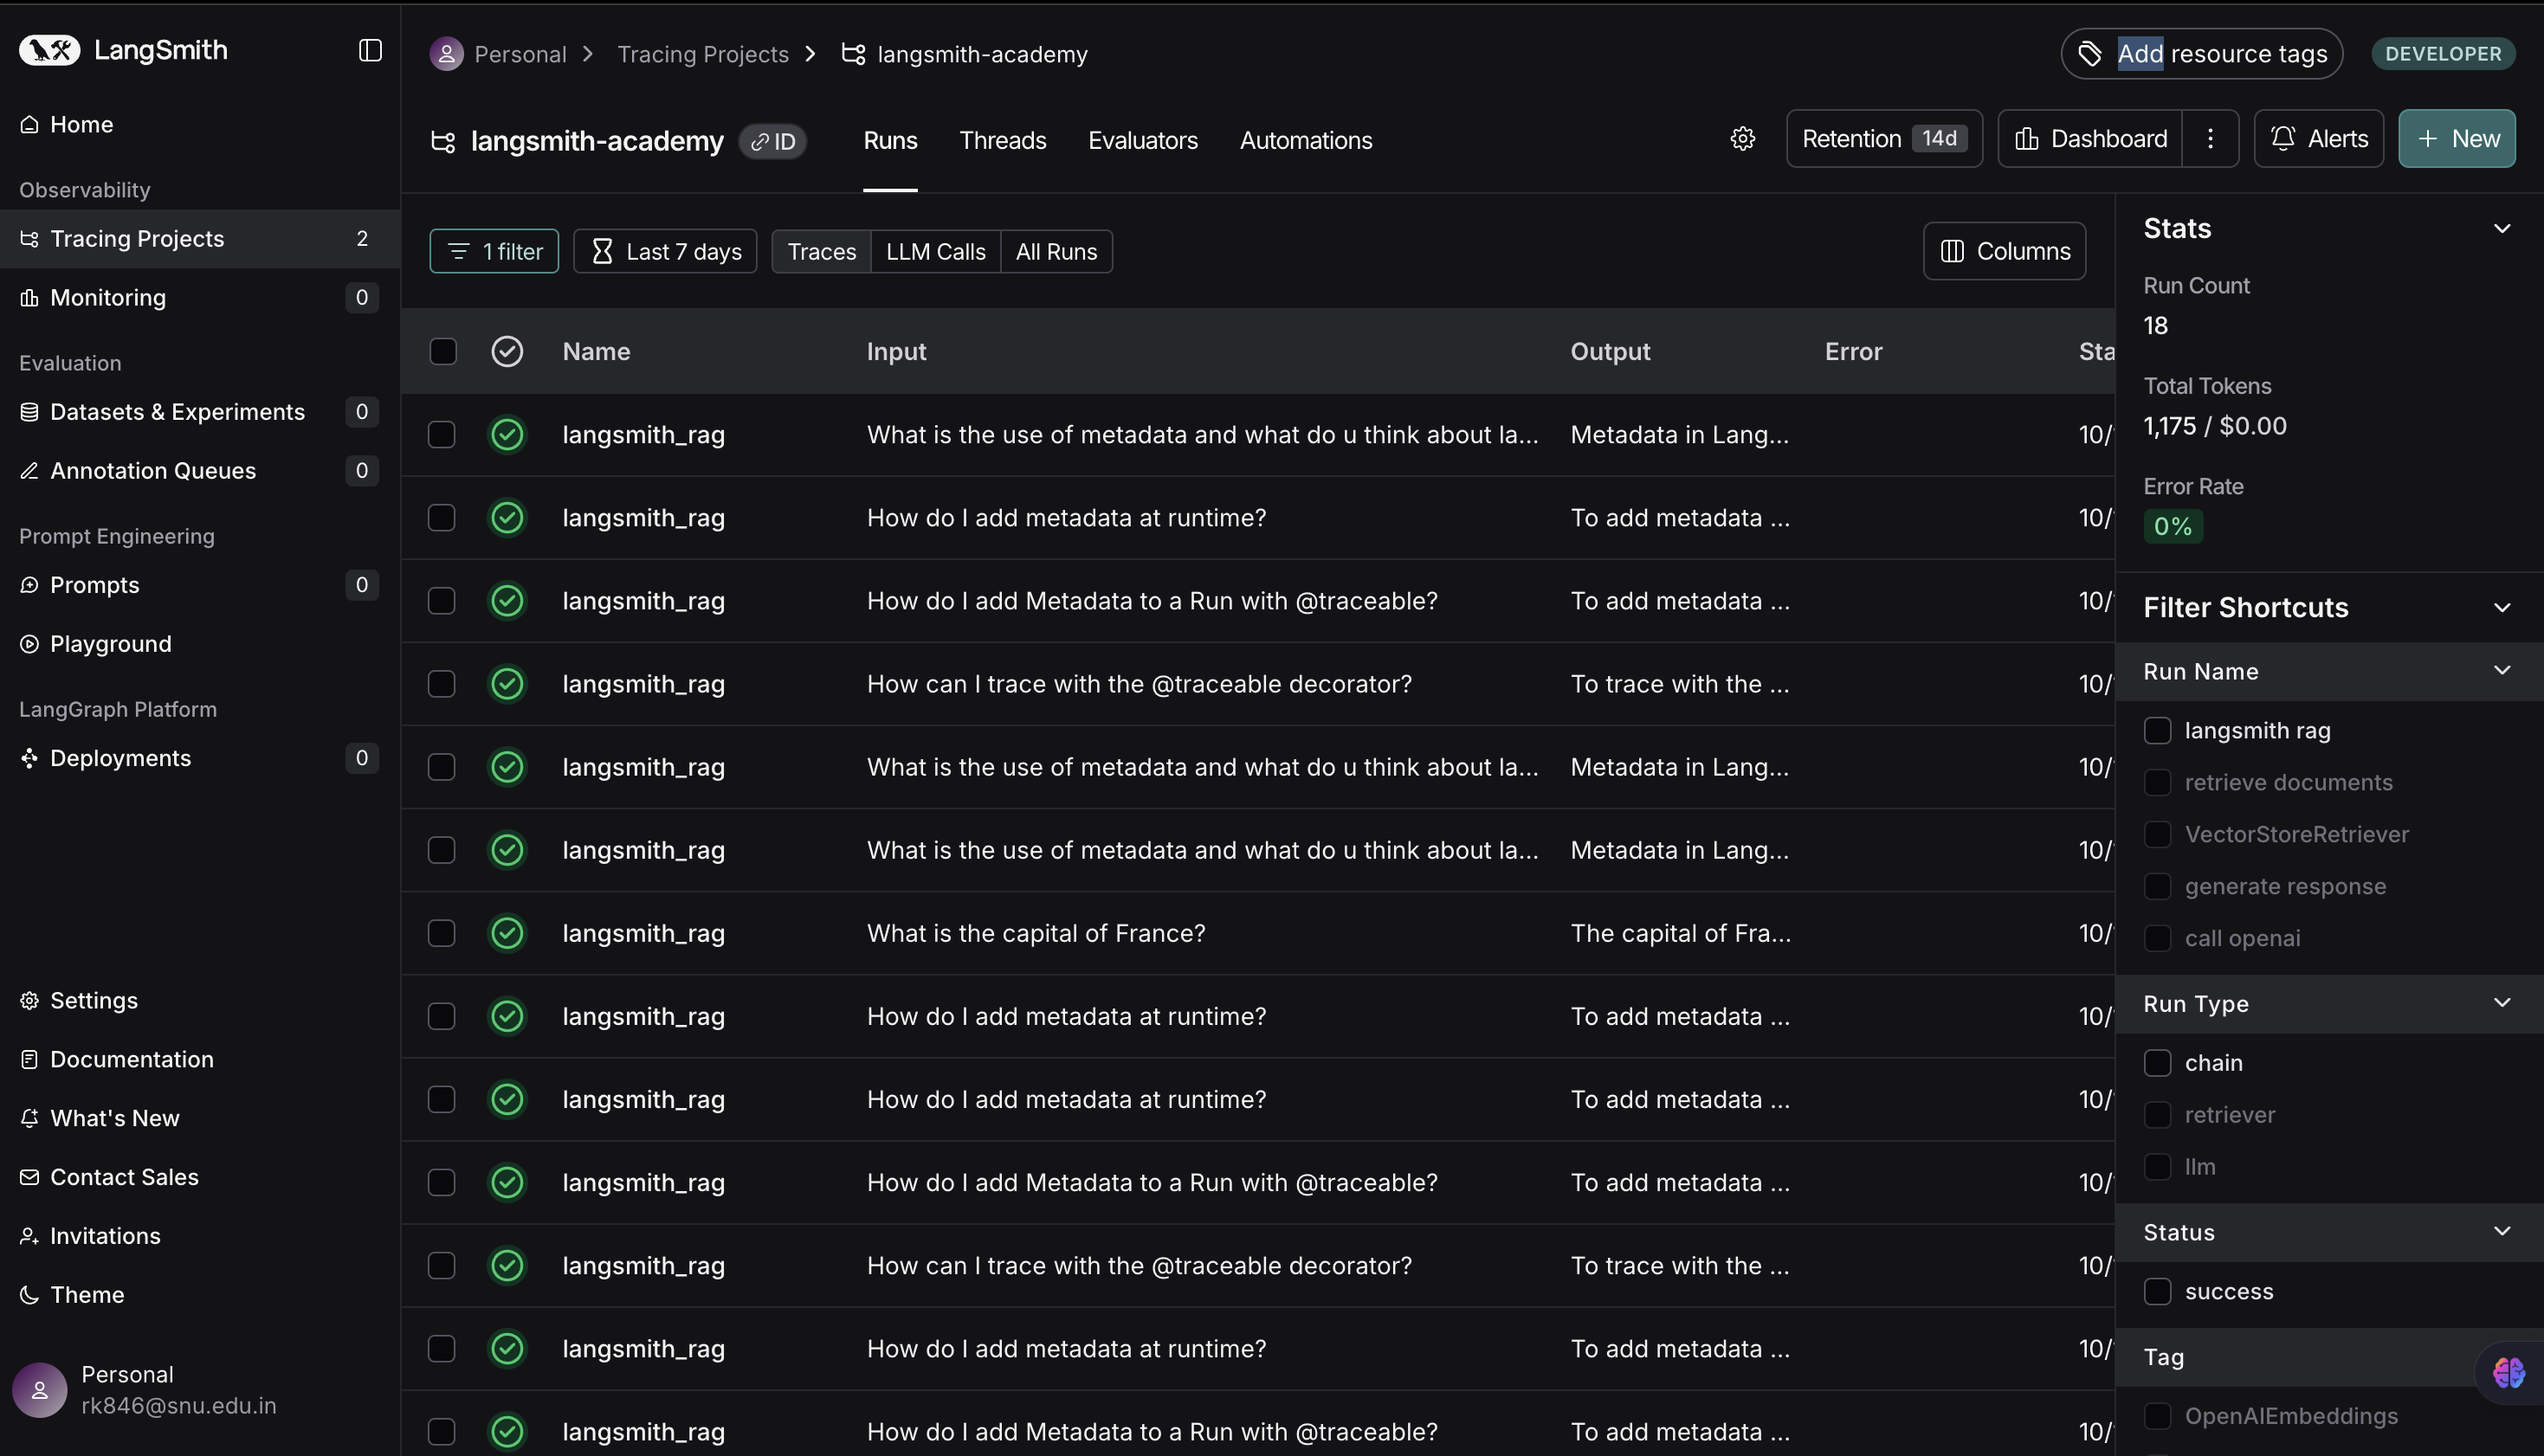

In [31]:
question = "How can I trace with the @traceable decorator?"
ai_answer = langsmith_rag(question)
print(ai_answer)

To trace with the @traceable decorator in Python, simply decorate any function you want to log traces for with @traceable. Ensure that the LANGSMITH_TRACING environment variable is set to 'true' and the LANGSMITH_API_KEY is configured with your API key. When calling a synchronous function wrapped with @traceable, use the await keyword to ensure the trace is logged correctly.


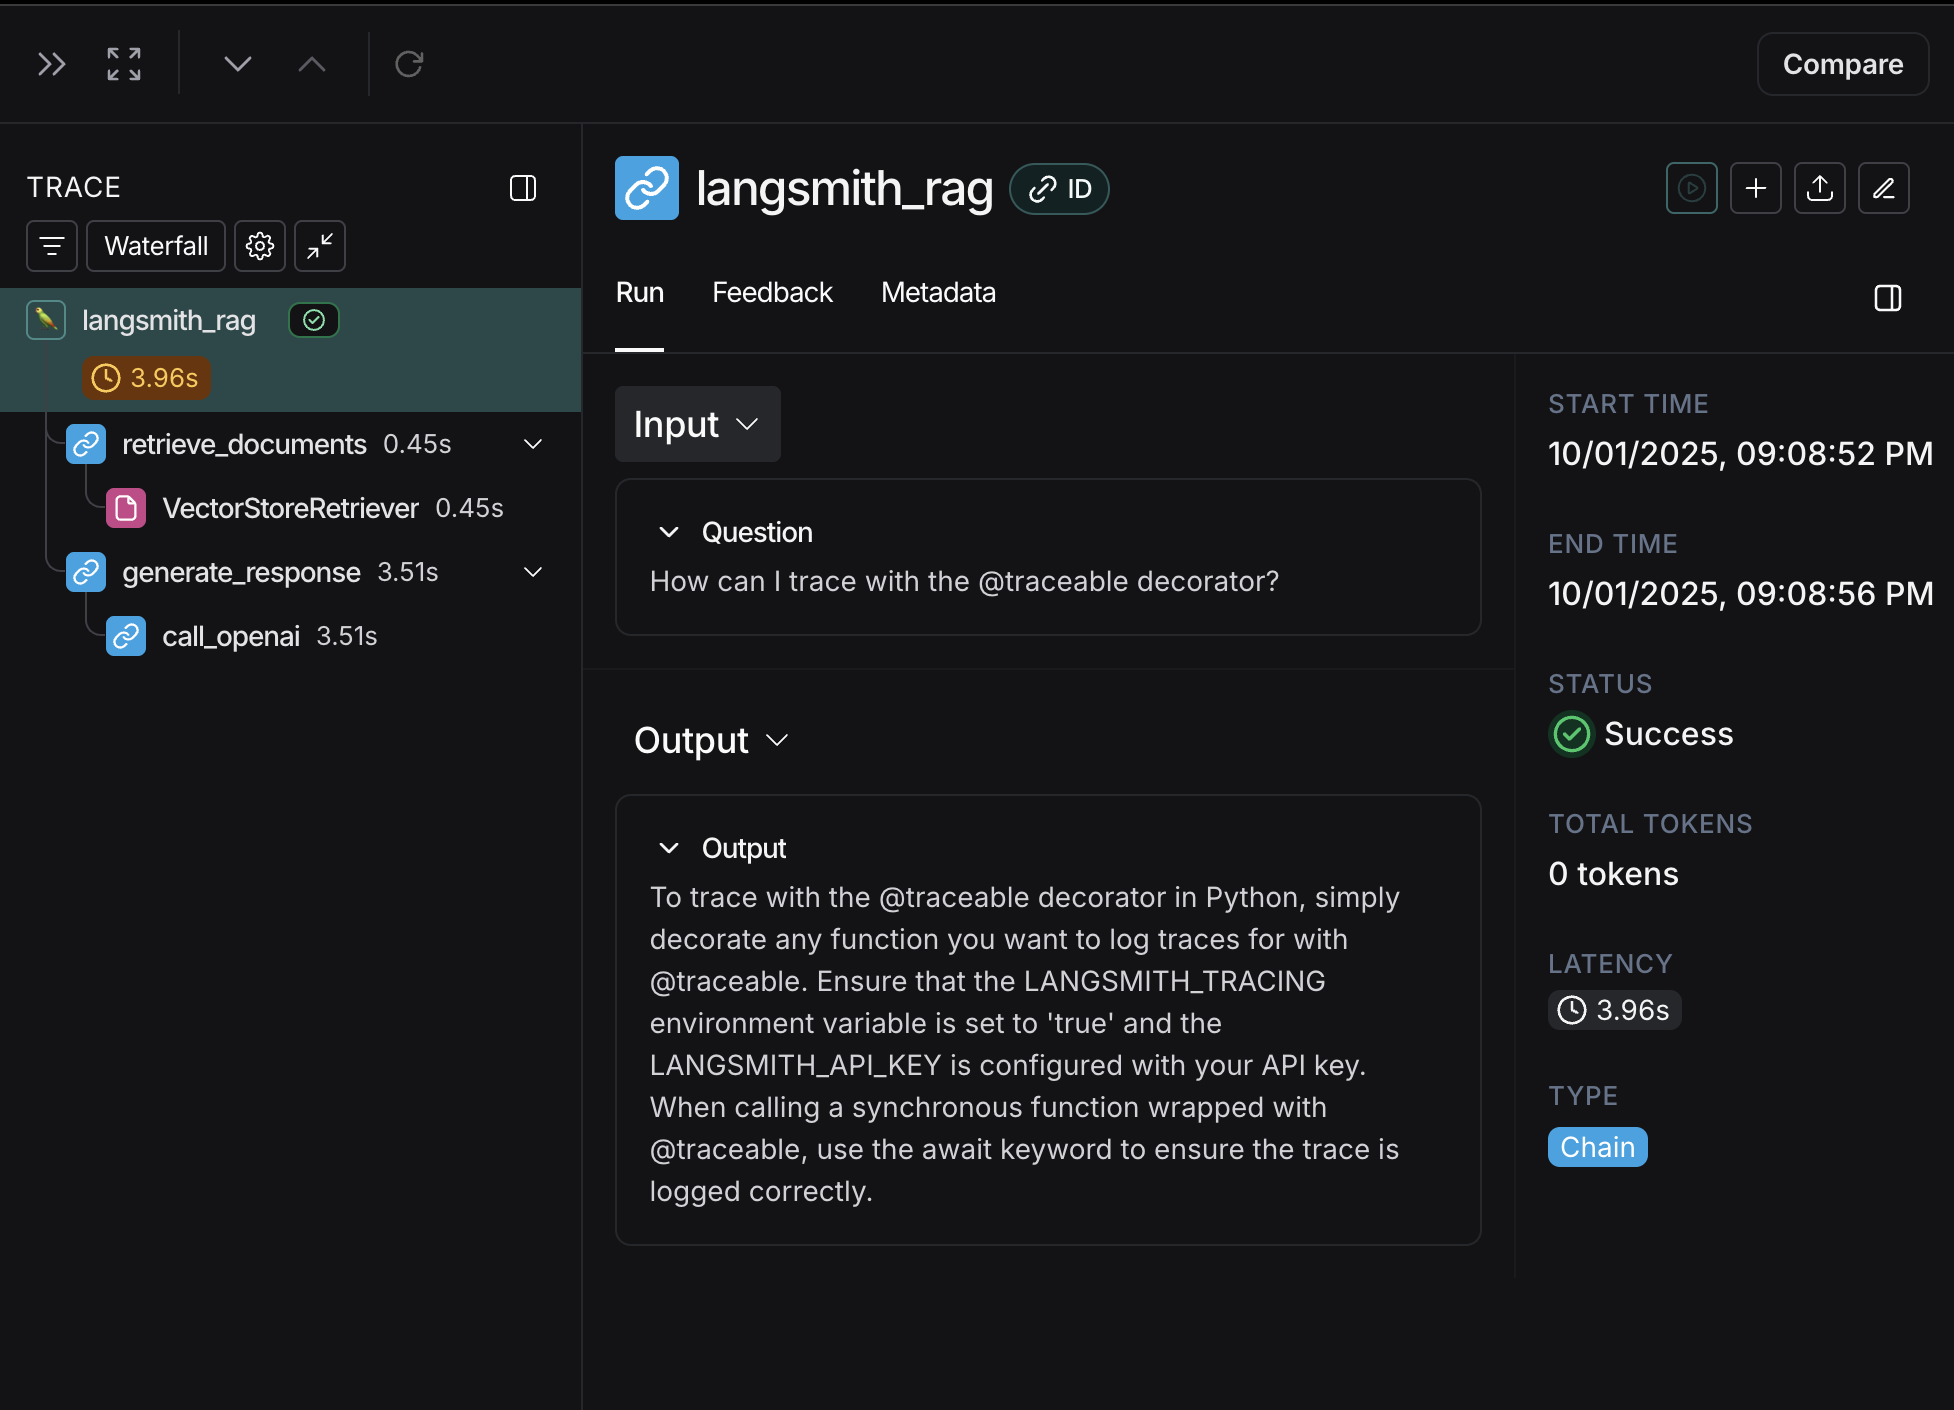

## MY OWN CODES


In [32]:
question = "what is the benefit of using the @traceable decorator?"
ai_answer = langsmith_rag(question)
print(ai_answer)

The @traceable decorator simplifies the process of logging traces in your application with minimal code changes. It automatically logs the execution of the decorated function, ensuring that traces are captured correctly. This allows for better observability and analysis of your application's performance and behavior.


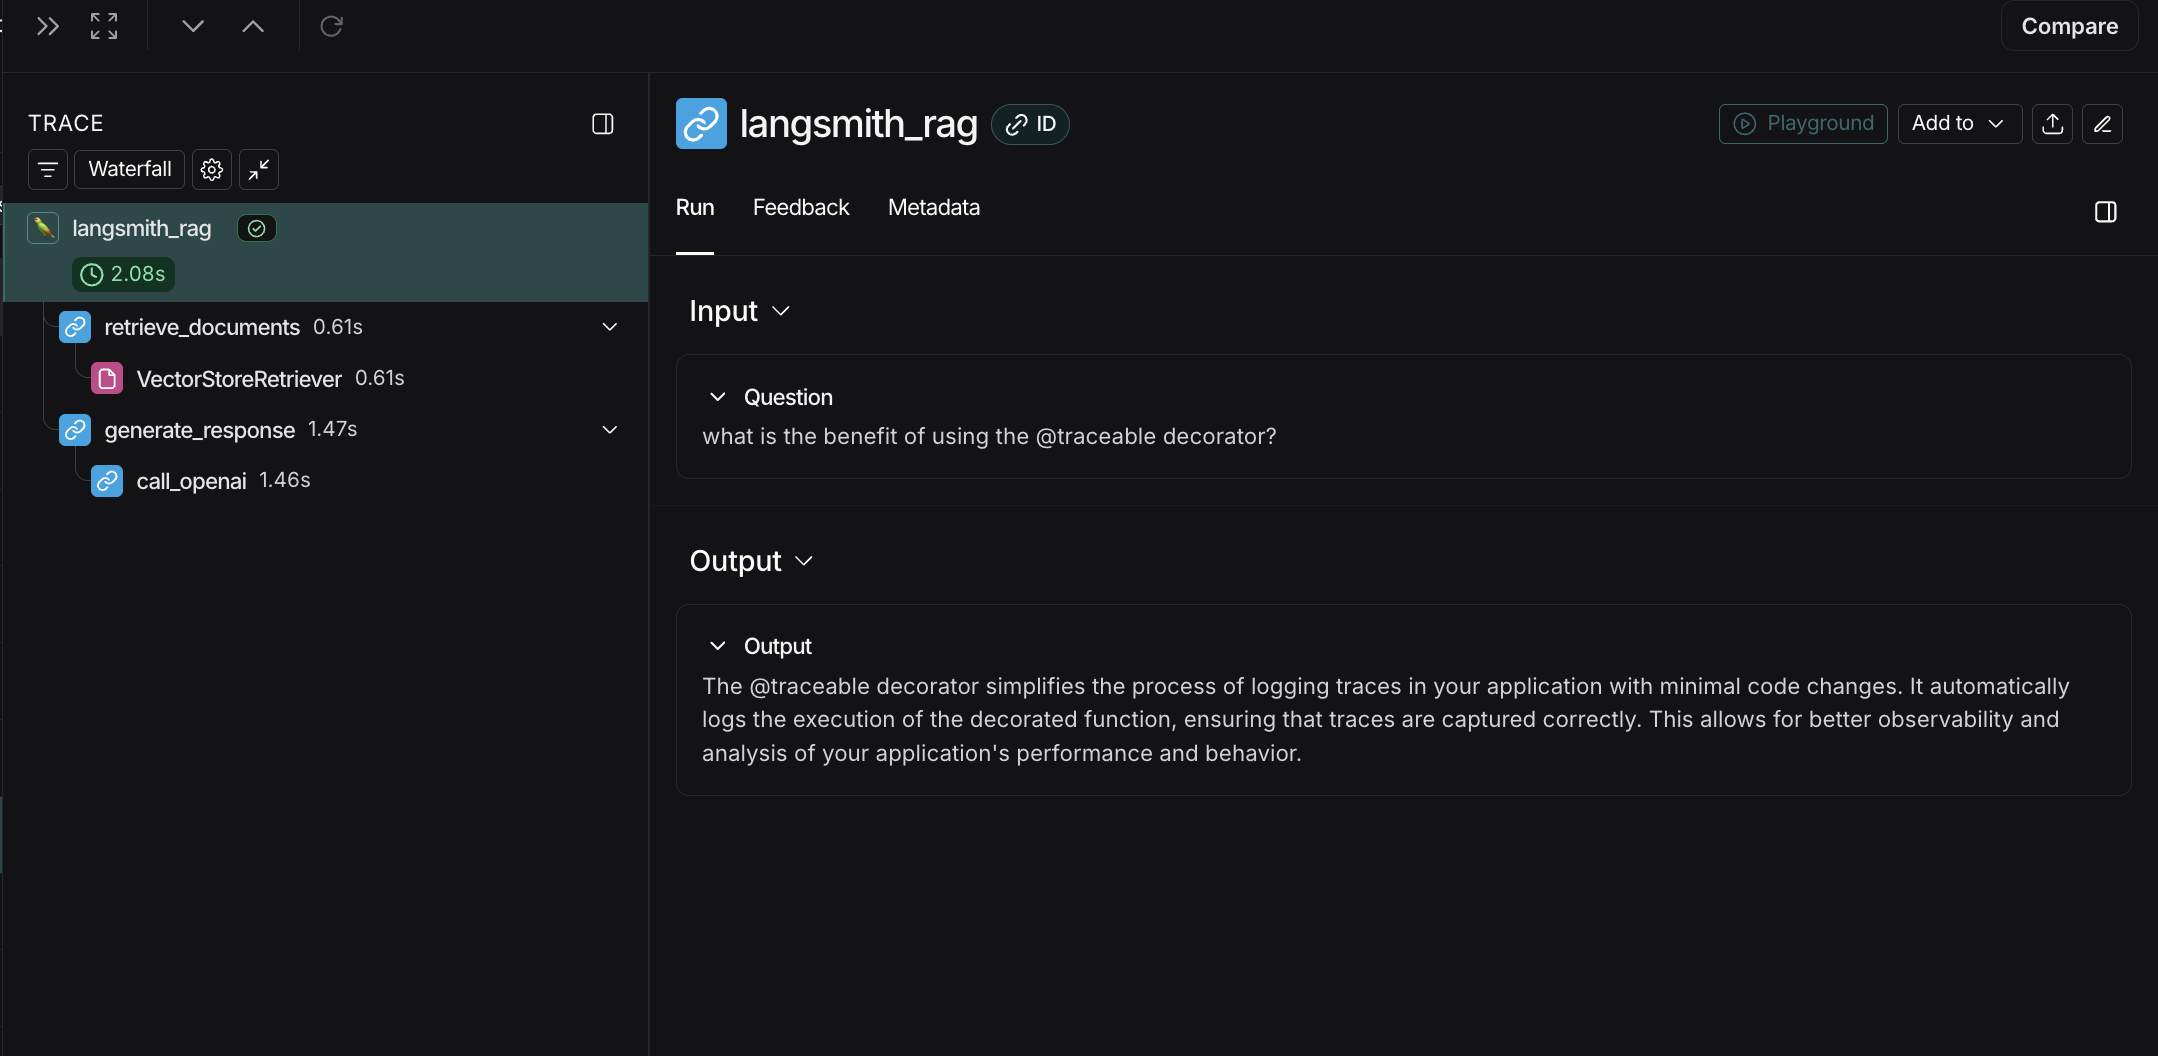

In [33]:
question = "who made the @traceable decorator?"
ai_answer = langsmith_rag(question)
print(ai_answer)

The @traceable decorator is made by LangSmith. It is part of their Python SDK, designed to facilitate logging traces with minimal changes to existing code.


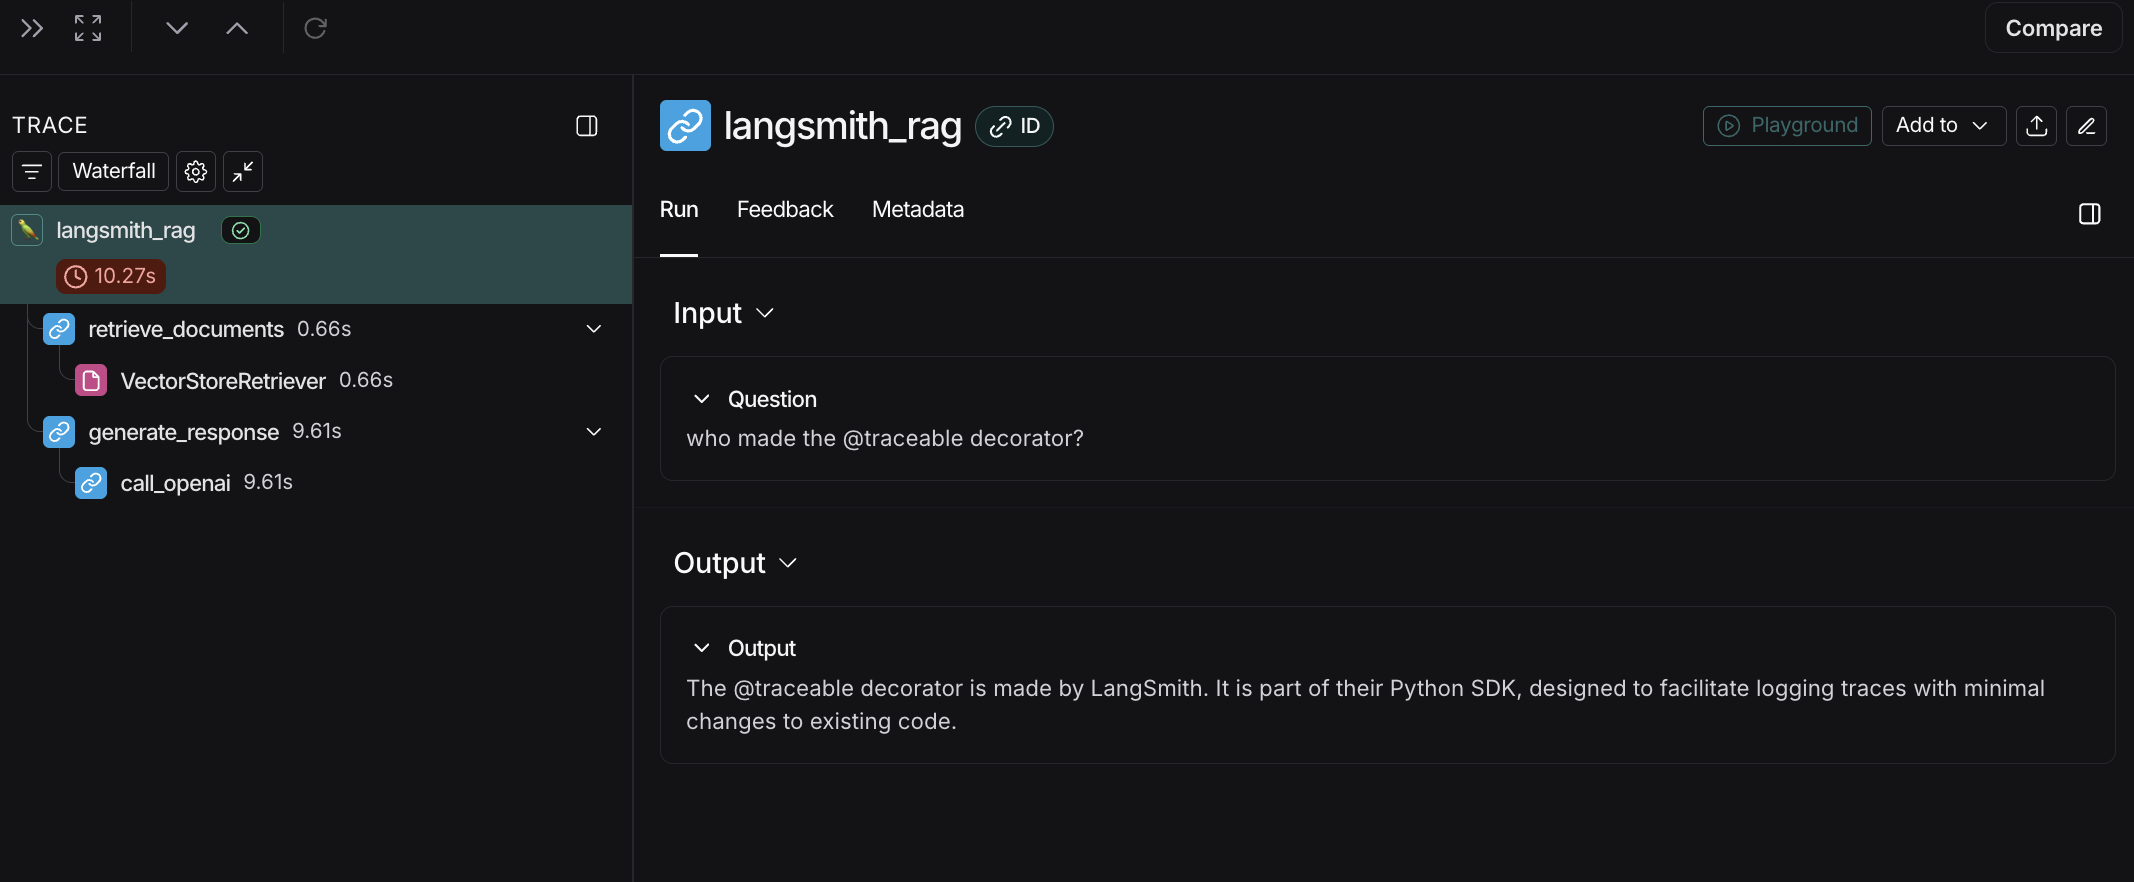

In [34]:
question = "Mention 4 types of people who would use @traceable decorator?"
ai_answer = langsmith_rag(question)
print(ai_answer)

1. Python developers looking to log traces for debugging and performance monitoring in their applications.  
2. Data scientists who want to track the performance of their machine learning models during development.  
3. Software engineers implementing custom chat models that require trace logging for observability.  
4. Teams using LangChain OSS or LangSmith wrappers to automatically log traces without additional setup.


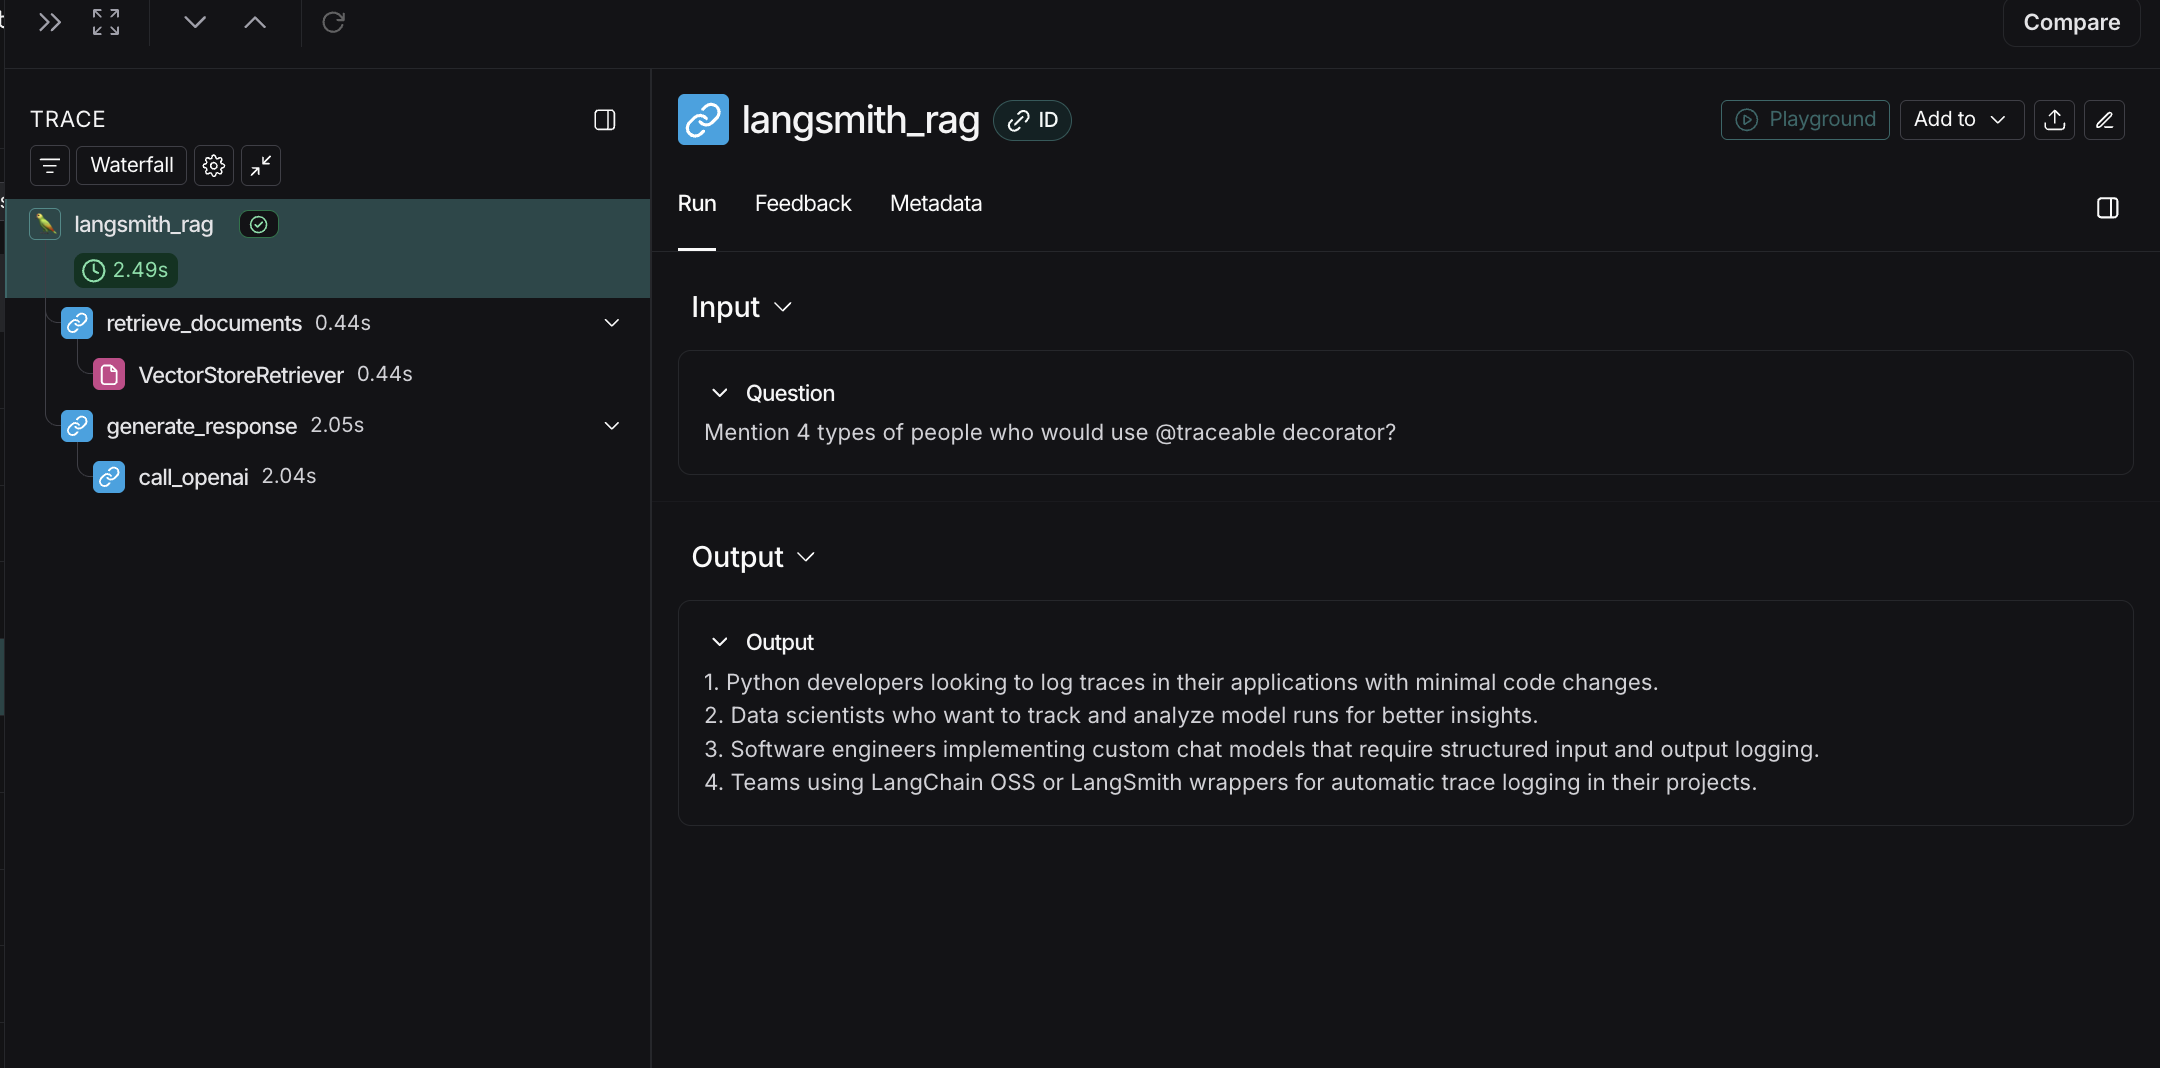

##### Let's take a look in LangSmith!

### Adding Metadata

LangSmith supports sending arbitrary metadata along with traces.

Metadata is a collection of key-value pairs that can be attached to runs. Metadata can be used to store additional information about a run, such as the version of the application that generated the run, the environment in which the run was generated, or any other information that you want to associate with a run. Similar to tags, you can use metadata to filter runs in the LangSmith UI, and can be used to group runs together for analysis.

In [35]:
from langsmith import traceable

@traceable(

    metadata={"vectordb": "sklearn", "MAT496_INSTRUCTOR": "Mr. Ajit Kumar"}
)
def retrieve_documents(question: str):
    return retriever.invoke(question)

@traceable
def generate_response(question: str, documents):
    formatted_docs = "\n\n".join(doc.page_content for doc in documents)
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Context: {formatted_docs} \n\n Question: {question}"
        }
    ]
    return call_openai(messages)

@traceable(

    metadata={"model_name": MODEL_NAME, "model_provider": MODEL_PROVIDER}
)
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def langsmith_rag(question: str):
    documents = retrieve_documents(question)
    response = generate_response(question, documents)
    return response.choices[0].message.content


#### I added my own metadata up there in the code : "MAT496_INSTRUCTOR": "Mr. Ajit Kumar"
#### that and "vecordb : sklearn" were added in the metadata for this trace


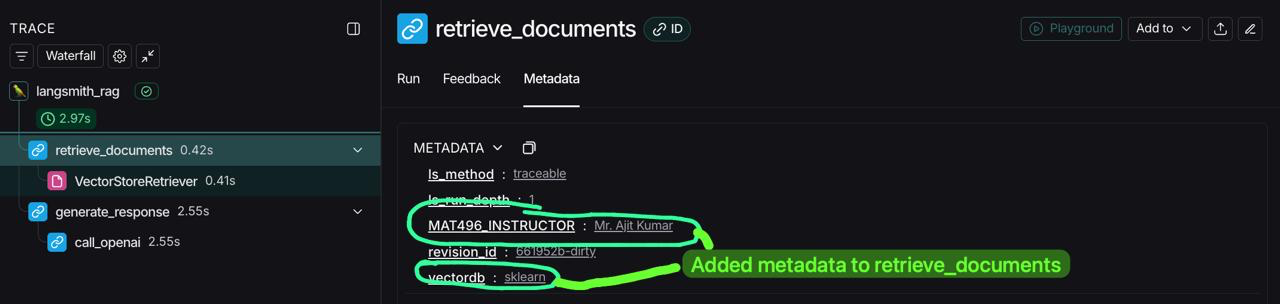

#### I used filters to search for metadata in a file

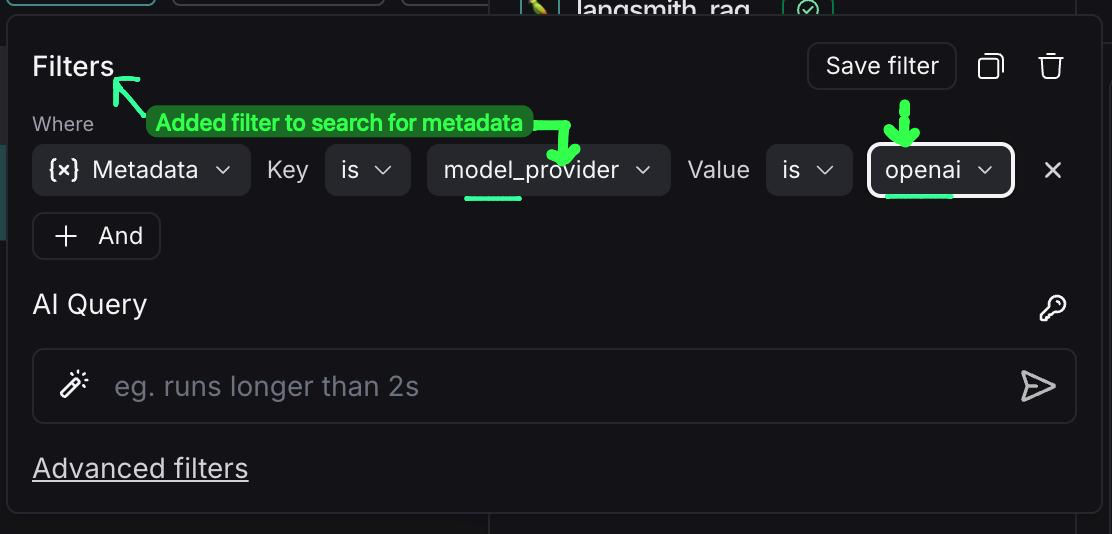

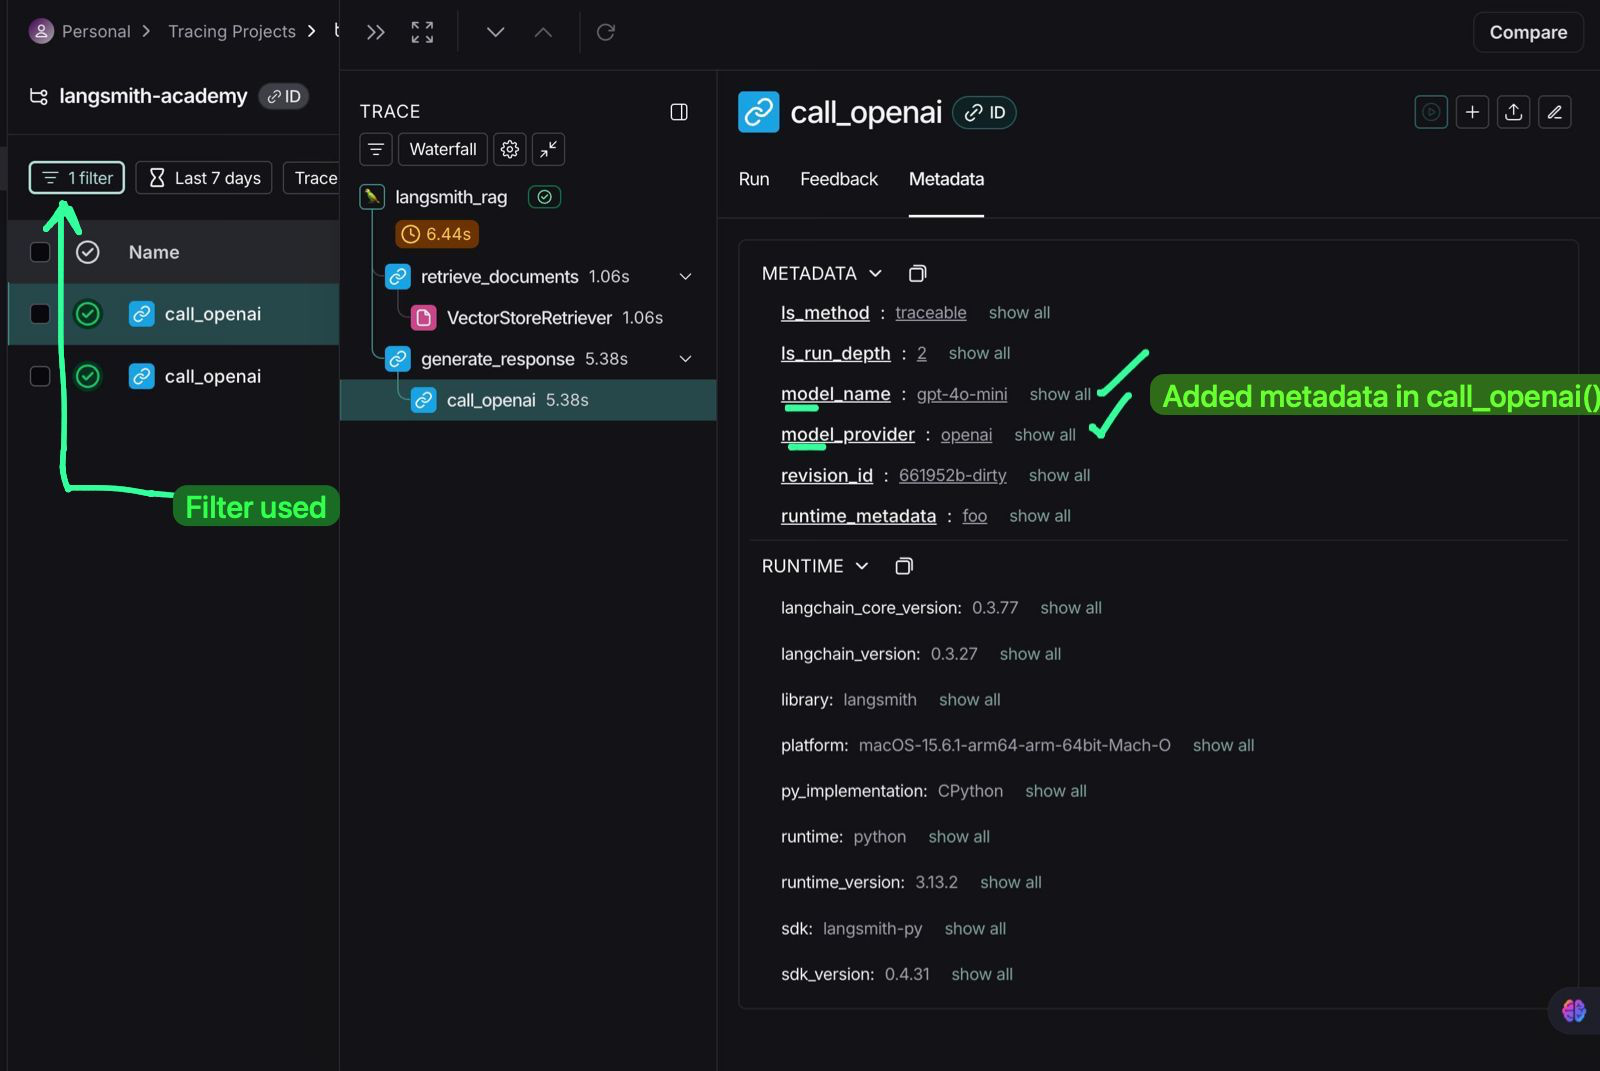

In [36]:
question = "How do I add Metadata to a Run with @traceable?"
ai_answer = langsmith_rag(question)
print(ai_answer)

To add metadata to a run with `@traceable`, you can include a `metadata` object within the `experimental_telemetry` parameter when calling the `generateText` function. For example, you can pass metadata like `{ userId: "123", language: "english" }` to help organize and filter your traces. This metadata will then be visible in your LangSmith dashboard.


### Defined a function of my own named "Langsmith_rag2"

In [37]:


@traceable(

    metadata={"Version": "MAT496.00.00.1", "MAT496_CLASSROOM": "D022"}
)
def retrieve_documents(question: str):
    return retriever.invoke(question)

@traceable
def generate_response(question: str, documents):
    formatted_docs = "\n\n".join(doc.page_content for doc in documents)
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Context: {formatted_docs} \n\n Question: {question}"
        }
    ]
    return call_openai(messages)

@traceable(

    metadata={"model_name": MODEL_NAME, "model_provider": MODEL_PROVIDER}
)
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def langsmith_rag2(question: str):
    documents = retrieve_documents(question)
    response = generate_response(question, documents)
    return response.choices[0].message.content


In [38]:
question = "Is there any other method to add metadata to a Run with @traceable?, make a bullet list"
ai_answer = langsmith_rag2(question)
print(ai_answer)

- You can attach metadata directly to the run when creating or modifying it in the LangSmith UI.
- Use the annotation queue to add or modify metadata before adding the run to a dataset.
- Apply automation rules to automatically add metadata to runs that meet specific criteria.


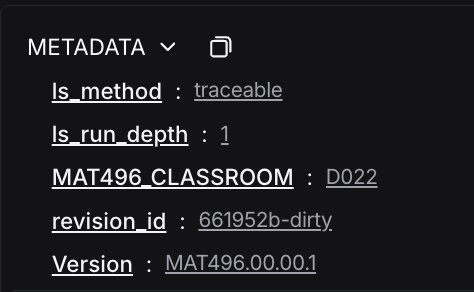

You can also add metadata at runtime!

In [39]:
question = "How do I add metadata at runtime?"
ai_answer = langsmith_rag(question, langsmith_extra={"metadata": {"runtime_metadata": "foo"}})
print(ai_answer)

To add metadata at runtime, you can attach it when running an experiment in the SDK by including it in your experiment configuration. This metadata can include details like the model used, model provider, or any other relevant information. Ensure that the metadata is structured as key-value pairs for effective filtering and analysis later.


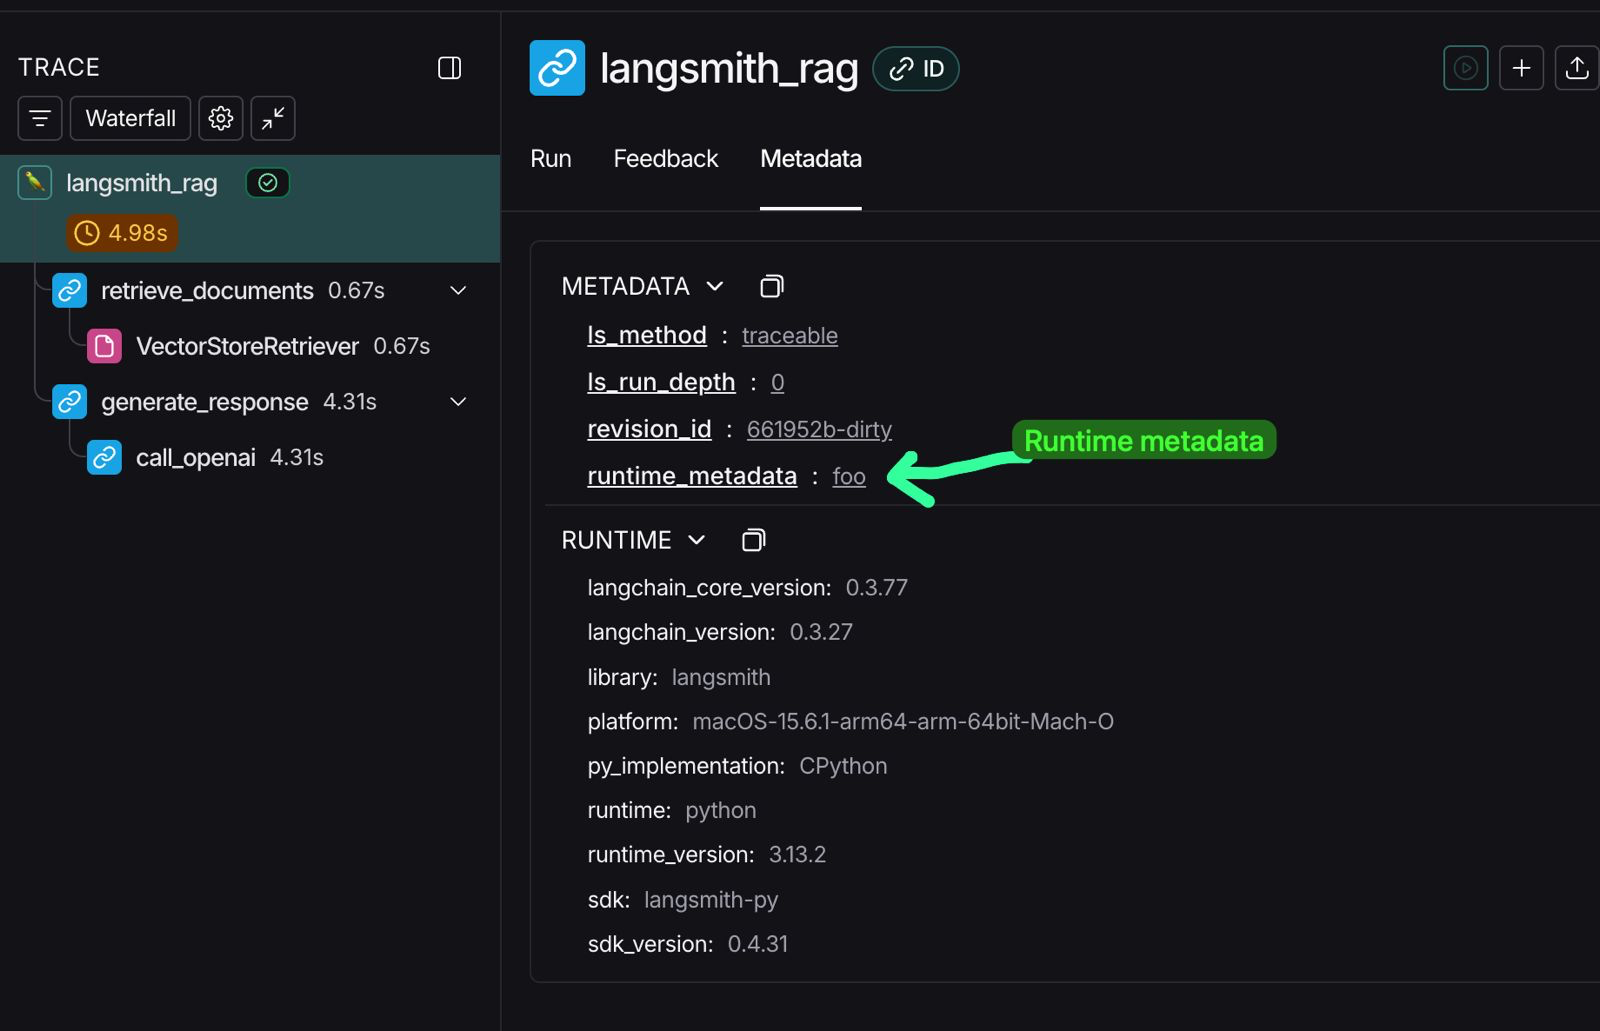

#### my own codes, with custom metadata at runtime

In [40]:
question = "What is the use of metadata and what do u think about langsmith in general is it good?"
ai_answer = langsmith_rag(question, langsmith_extra={"metadata": {"mat496": "yess!!", "Midsems": "soon", "question": question}})
print(ai_answer)

Metadata in LangSmith is used to store additional information about traces, such as execution environment or user details, in a key-value format. This helps in categorizing and labeling traces for better observability and analysis. As for LangSmith, it appears to be a robust platform for LLM observability and evaluation, offering various features for managing and analyzing traces effectively.


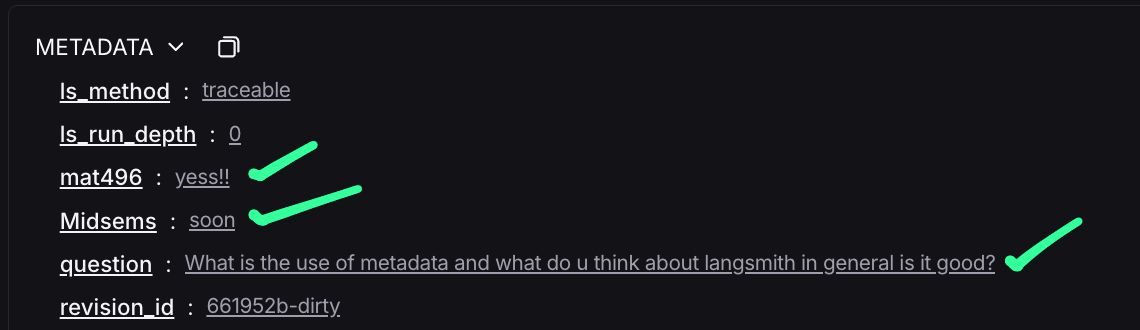

In [41]:
question = "Enlist 5 benefits of using runtime metadata in bullet points"
ai_answer = langsmith_rag(question, langsmith_extra={"metadata": {"bullets": "yes", "Rishit": "Tracingbasics"}})
print(ai_answer)

- Enhances traceability by providing context for each trace, including environment details and conversation IDs.
- Facilitates efficient filtering and searching of traces, improving data navigation and analysis.
- Supports benchmarking by allowing the comparison of performance metrics across different application versions.
- Aids in regression testing by highlighting changes relative to baseline performance.
- Enables better management of multimodal data by providing structured information about attachments and their usage.


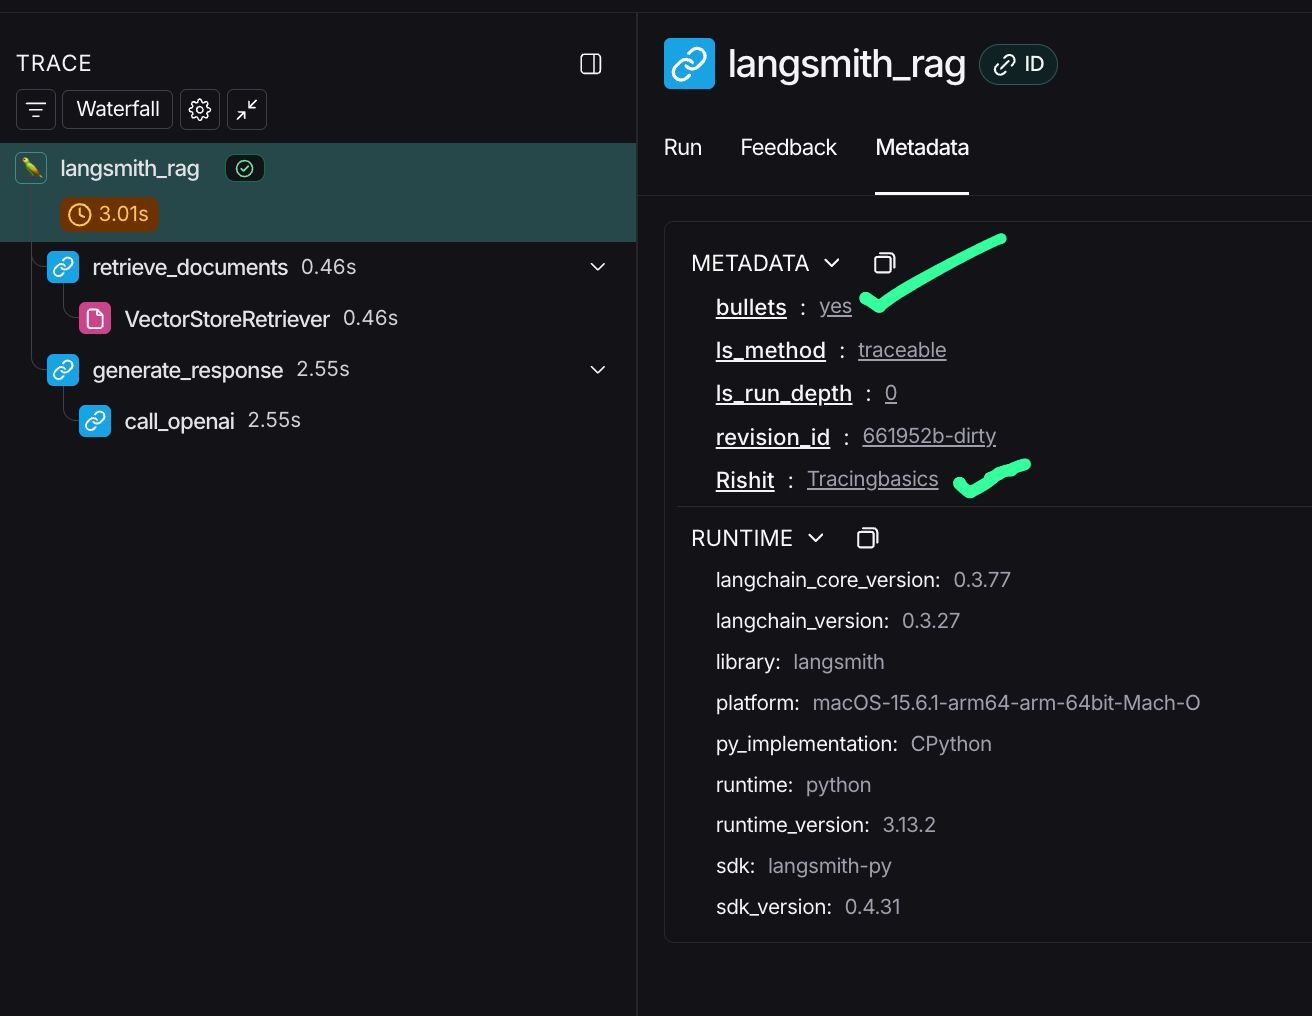

##### Let's take a look in LangSmith!